# Lesson 4 Review and Lesson 5 Prework

## Lesson 4 Review Topics and Coding Tips
1. Coding: melt, pivot, masking, break vs continue vs pass, correlation/heatmap
2. Statistics: t-test, Power Analysis, Confidence Interval, Confidence Level, Significance Level, P-value, Statistically Significant, R^2
3. Git/Terminal: Most used commands

## Lesson 5 Topics
Linear Regression

## Cheat Sheet
I have a cheat sheet on my github page: https://github.com/azedlee/dsi2-cheatsheet
The definitions part is not completed and I stopped updating the "entire.py" page. Most of everything else is finished. For now, datamunging.py and edagraphing will be most helpful for you.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

%matplotlib inline

# Lesson 4 Review Topics and Coding Tips

From your exit tickets, I noticed a lot of people prefer to have examples that they can walk through and understand how the code works. For this review and prework session, I will provide some useful functions and a basic programming explanation on how they work. Please let me know if this works.

# Coding

## Pivot Table

Pivot Tables changes dataframes from long to wide format. They are useful for data summarization. Pandas' pivot_table isn't as intuitive as Excel's drag and drop, but still does the job. It is a bit more confusing to understand. Below is an explanation on how to use pivot_table and its parameters.

df_wide = pd.pivot_table(
    1. df_long, # The Data frame you want to convert
    2. columns=['col'], # The values in the long df you want to assign for the wide dataframe
    3. values='value', # The values in the long df you want to pivot to the wide dataframe
    4. index=['subject_id'], # The columns in the long df you want to become the index for the wide dataframe
    5. aggfunc=np.mean, # Aggregate function that defaults to the mean, can put own function in, works like .apply 
    6. fill_value=np.nan # Fills in all empty values as assigned value
        )

Here is an example of how to use pivot_table

In [4]:
df_long = pd.DataFrame(data={'A': ['Reid', 'Reid', 'Reid', 'Reid', 'Reid', 'Ed', 'Ed', 'Ed', 'Ed'],
                             'B': ['student_1', 'student_1', 'student_1', 'student_2', 'student_2', 'student_1', 'student_1', 'student_2', 'student_2'],
                             'C': ['homework', 'quizzes', 'quizzes', 'homework', 'homework', 'quizzes', 'homework', 'homework', 'quizzes'],
                             'D': [100, 80, 83, 95, 98, 60, 75, 80, 83]})

In [5]:
df_long

,A,B,C,D
0,Reid,student_1,homework,100
1,Reid,student_1,quizzes,80
2,Reid,student_1,quizzes,83
3,Reid,student_2,homework,95
4,Reid,student_2,homework,98
5,Ed,student_1,quizzes,60
6,Ed,student_1,homework,75
7,Ed,student_2,homework,80
8,Ed,student_2,quizzes,83


In [10]:
df_wide = pd.pivot_table(df_long, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.mean, fill_value='None')
df_wide

C               homework quizzes
A    B                          
Ed   student_1      75.0      60
     student_2      80.0      83
Reid student_1     100.0    81.5
     student_2      96.5    None

## Melt

Melt is the opposite of pivot_table, where it changes the dataframe from wide to long. Same as pivot_table, it is confusing to use, but useful if the data and model you are using are not compatible in wide format. Below is an explanation on how to use melt and its parameters.

df_long = pd.melt(
    1. df_wide, # The Data frame you want to convert
    2. id_vars=['col1','col2'], # The identifiers for the other columns
    3. value_vars=, # The value that identifies to each id_vars
    4. var_name=, # The column name for value_vars
    5. value_name=) # The column name for the values for each value_vars
    
Here is an example on how to use melt.

In [11]:
df_wide = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})

In [12]:
df_wide

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [14]:
df_long = pd.melt(df_wide, id_vars=['A'], value_vars=['B', 'C'], var_name='myVarname', value_name='myValname')
df_long

,A,myVarname,myValname
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


## Break vs Continue vs Pass

These 3 commands are usually used in loops and switch statements, but can also be used in functions. Each term has specific uses.

1. break - breaks out of a loop, regardless of where the loop is currently at
2. continue - continues to the next loop iteration
3. pass - does nothing, but allows the program to keep running, usually used for syntactical testing

In [37]:
# Breaks when i == 3
for i in range(0, 5):
    if i == 3:
        break
    print i

0
1
2


In [35]:
# Prints 3 because it is just a placeholder
for i in range(0, 5):
    if i == 3:
        pass
    print i

0
1
2
3
4


In [36]:
# Does not print 3 because it continues to the next iteration
for i in range(0,5):
    if i == 3:
        continue
    print i

0
1
2
4


## Correlation and Heatmaps

Correlation measures the strength between 2 features. There are 3 different types of correlation tests (Pearson, Spearman and Kendall), but we will mostly be using 2 (Pearson and Spearman).

Pearson Correlation - evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.

Spearman Correlation - evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

Below I'll show you an example between the correlations and the strength of using heatmaps (also the code for creating a heatmap)

In [105]:
sleep = pd.read_csv('/Users/edwardlee/Desktop/df-sf-32/DS-SF-32/dataset/msleep.csv')

In [106]:
sleep.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [109]:
# Check NaN values
sleep.isnull().sum()

name             0
genus            0
vore             7
order            0
conservation    29
sleep_total      0
sleep_rem       22
sleep_cycle     51
awake            0
brainwt         27
bodywt           0
dtype: int64

In [110]:
# Since these are the 3 columns I want to use, I will set the NaN values 0 for now
sleep[['sleep_rem', 'sleep_cycle', 'brainwt']].fillna(0, inplace=True)

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [114]:
sleep.columns

Index([u'name', u'genus', u'vore', u'order', u'conservation', u'sleep_total',
       u'sleep_rem', u'sleep_cycle', u'awake', u'brainwt', u'bodywt'],
      dtype='object')

In [115]:
sleep[[u'sleep_total', u'sleep_rem', u'sleep_cycle', u'awake', u'brainwt', u'bodywt']].corr(method='pearson')

,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
sleep_total,1.000000,0.751755,-0.473713,-0.999999,-0.360487,-0.312011
sleep_rem,0.751755,1.000000,-0.338123,-0.751771,-0.221335,-0.327651
sleep_cycle,-0.473713,-0.338123,1.000000,0.473713,0.851620,0.417803
awake,-0.999999,-0.751771,0.473713,1.000000,0.360487,0.311980
brainwt,-0.360487,-0.221335,0.851620,0.360487,1.000000,0.933782
bodywt,-0.312011,-0.327651,0.417803,0.311980,0.933782,1.000000


Above is the correlation of sleep pattens for all animals, but it is kind of messy since it is all numbers. Let's make a heatmap!

In [126]:
# Save the correlation I want to see into another variable so it is easier to use later on
sleep_corr_p = sleep[[u'sleep_total', u'sleep_rem', u'sleep_cycle', u'awake', u'brainwt', u'bodywt']].corr(method='pearson')
sleep_corr_s = sleep[[u'sleep_total', u'sleep_rem', u'sleep_cycle', u'awake', u'brainwt', u'bodywt']].corr(method='spearman')

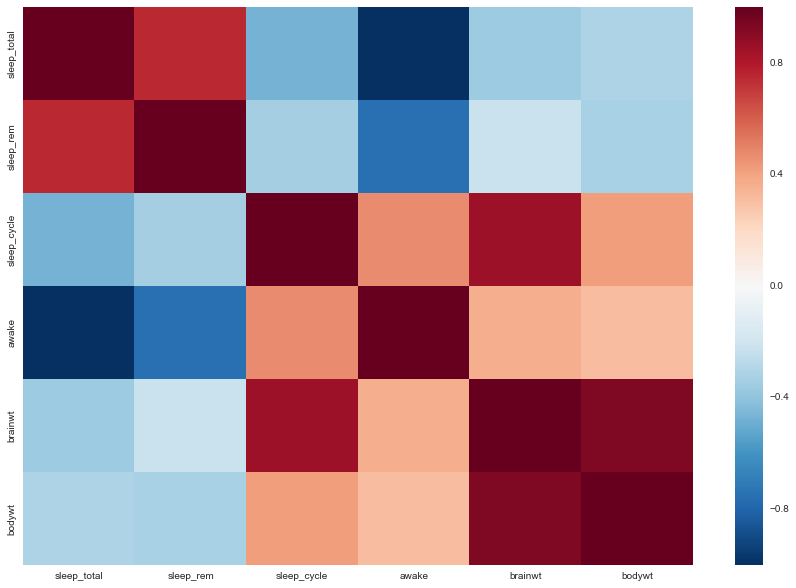

In [137]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()

ax = sns.heatmap(sleep_corr_p)

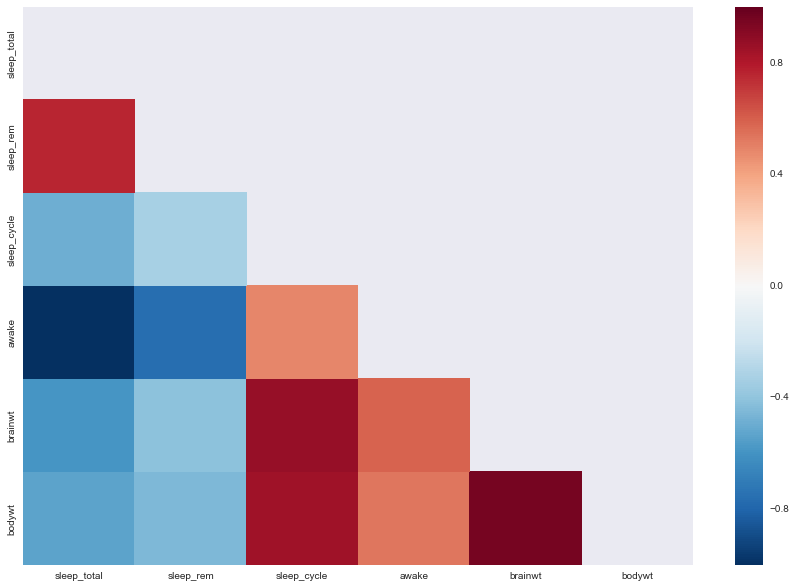

In [139]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()

# This mask cuts the heatmap in half, you can use it if you want, but not necessary
mask = np.zeros_like(sleep_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(sleep_corr_s, mask=mask)

Correlation heatmaps are much easier to look at than just a correlation of numbers. Remember to look at the differences between spearman and pearson!

# Statistics

1. P-value - Assuming the Null Hypothesis is true, the obtained samples observed would have a difference of x% due to random sampling error.
2. Significance Level (alpha) - Also known as the "Critical Region," If you have a significance level (alpha) of 0.05 and your p-value is 0.02, you can conclude that your test results are statistically significant and reject the null.
3. Confidence Level (1 - alpha) * 100 - Confidence Level is the opposite of significance level, where you are confident (ie. 95%) that the sample will reside within the confidence interval of 95% (ie. 2.5 to 97.5) of the distribution
4. Confidence Interval - We would expect the true population to fall within the interval estimates
5. Statistically Significant - If your CI is 95% with a p-value of 0.05 (0.025 if 2-tail), if the alpha falls within the critical region, which is how far our sample statistic must be from the null hypothesis, then we can say the data is unusual enough to reject the null.
6. Type I vs Type II error - http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/basics/type-i-and-type-ii-error/

I tried writing up a basic t-test example, but I found that the post below does a MUCH better job. I will still do one if people want to see more examples (please leave a note in the Exit Tickets!), but I must recommend reading this post. It has explanations and Python code.

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html

# Git/Terminal

## Common Git/Terminal Commands

### Terminal Commands

1. cd .. - Goes up 1 directory
2. cd ../../ - Goes up 2 directories (you can hit tab twice to see where you are at)
3. ls - lists all files in the directory
4. mkdir - creates a new folder
5. touch hi.txt - creates an empty text file called hi.txt
6. echo "Hello World" >hi.txt - creates a new text file called hi.txt with Hello World as the first line

### Git Commands

1. git status - Always perform a git status before doing any other git commands to see all modified changes
2. git add ./filename - Adds the file (or all with the .) ready to be committed as a new version, git status to make sure you have the correct files
3. git commit -m "new updates" - Commits the files that were git added as a new version. -m is to leave a message to see what you have changed in this version
4. git pull - pulls all newly updated pushed data
5. git push - pushes all newly updated data from commit
6. git fetch --all - fetches the newest version from the repository
7. git reset --hard origin/master - MAKE SURE TO BACK UP YOUR FILES BEFORE THIS COMMAND. After using the git fetch command, this will reset all files in repository to the newest version. You will LOSE all edits to any files you made.

# Lesson 5 Pre-work

## Linear Regression

Since Reid has already posted his Linear Regression ppt online, I will focus more on extra reading material. If you want more extra Python coding on Linear Regression, please mention it in the Exit Ticket or slack me directly and I will include one in the next review/prework.

This is a great, free online course for Penn States' Statistic Course.
https://onlinecourses.science.psu.edu/stat501/node/250

### What are the differences between a Correlation and a Linear Regression? Aren't they doing the same thing?

First things first, they are not the same. They are similar, but achieve different goals. I'll break them down into similarities and differences.

#### Similarities
- The standardised regression coefficient is the same as Pearson's correlation coefficient
- The square of Pearson's correlation coefficient is the same as the R^2 in simple linear regression
- Neither simple linear regression nor correlation answer questions of causality directly. This point is important, because I've met people that think that simple regression can magically allow an inference that X causes Y.

#### Differences
- Correlation quantifies the relationship between two variables. Correlation does not fit a line through the data.
- Correlation typically refers to Pearson Correlation, but there are other correlations, such as Spearman's Correlation.
- It does not matter whether you call which feature X or Y, you will get the same correlation if you swap them. With linear regression, you have to decide your independent/predictor variable (X) with your dependent/target variable (Y). You are looking for a best fit line that predicts Y from X, and it will definitely be different if you swap them around.
- Linear Regression fits a best fit line to predict Y from X. If you were to bring in new data/samples, predictor X can help you predict the outcomes of Y, based off of previous data.
- Although both correlation and linear regression does not answer causality directly, with linear regression you do have to think about causality to determine whether X is the best predictor for Y.

In short, if you are interested in seeing the magnitude of the relationship between X and Y, use correlation. If you are interested in predicting and explaining your results in particular values, use linear regression.

### What are the differences between Simple Linear Regression/Ordinary Least Squares Regression (OLS)/Linear Least Squares? What about Multiple Linear Regression?

Ordinary Least Squares Regression (OLS) and Linear Least Squares are the same thing. The goal is to reduce the error rate or the squares. Looks something like this: https://training-course-material.com/images/a/ac/Images-mod2-linear12.gif How is it different from Simple Linear Regression? Not much, they are practically the same thing. In order to reduce the error rate/squares in OLS, you have to use Simple Linear Regression or Multiple Linear Regression in a dataset. The only difference is SLR has 1 target and 1 predictor, where as MLR has 1 target and 2 or more predictors.

### What is statistic interaction?

Remember in class we multiplied 2 features together to get a better R^2? The reason why we did that is to see if there is an interaction between the 2 features. We want to see if the effect of 1 independent variable will vary depending on the level of another independent variable.

This website provides some further insight on statistic interaction (the bottom of the page has graphs): 

https://courses.washington.edu/smartpsy/interactions.htm

This blog provides a simple and clear example on statistic interaction:

http://www.theanalysisfactor.com/interpreting-interactions-in-regression/